<a href="https://colab.research.google.com/github/sumathiselvan79/CE7454_2019/blob/master/Day5session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import packages needed for the procedure
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Coding for importing csv files in Google colab
from google.colab import files
import io
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['titanic1.csv']))
# read data as data
#df = pd.read_csv("/home/cyborg/Desktop/Workshop on DA and ML for IIIT internship students/Day 4-7/CSV/titanic1.csv"
# check the dimension of t1he table
print("The dimension of the table is: ",df.shape)
# check the columns
df.columns

Saving titanic1.csv to titanic1.csv
The dimension of the table is:  (891, 12)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


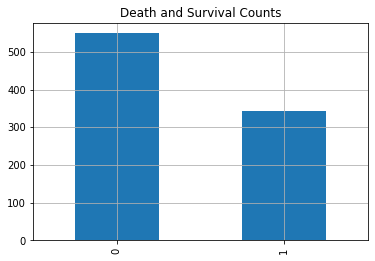

In [ ]:
#Now we have a general idea of the data set contents.
df['Survived'].value_counts().plot(kind='bar', title='Death and Survival Counts',grid=True)
plt.show()

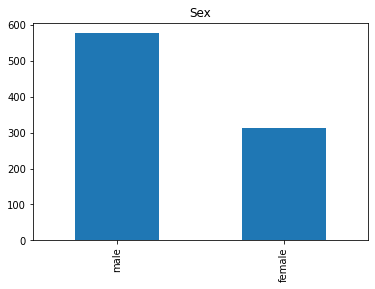

In [ ]:
#From this,we infer that majority of people did not survive the accident.
df['Sex'].value_counts().plot(kind='bar', title='Sex')
plt.show()

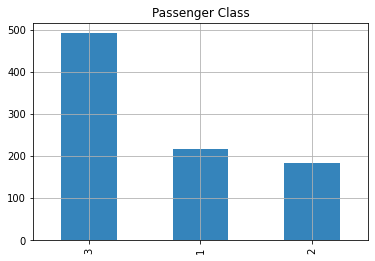

In [ ]:
#It can be infered that the majority of people in the ship were male.
df['Pclass'].value_counts().plot(kind='bar', title='Passenger Class',alpha=0.90,grid=True)
plt.show()

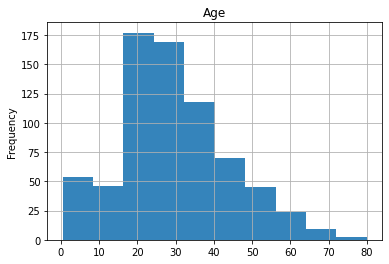

In [ ]:
#It can be infered that the largest number of passengers were in class 3 followed by class 1 and class 2.
df['Age'].plot(kind='hist',title='Age',alpha=0.90,grid=True)
plt.show()


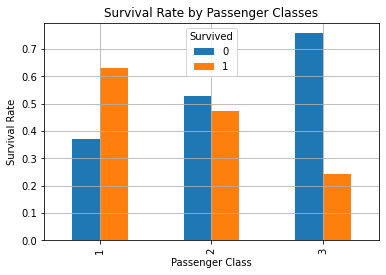

In [ ]:
#It can be infered that majority of passengers were in the age group 15-30 years.
#Feature1 : Passenger Class
# finding survival rate in the passenger class
rel_1=pd.crosstab(df['Pclass'],df['Survived'])
rel_1_normalize = rel_1.div(rel_1.sum(1).astype(float), axis=0)
rel_1_normalize.plot(kind='bar',title='Survival Rate by Passenger Classes',stacked=False,grid=True)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [ ]:
#Those in First Class has the highest chance for survival.
#Feature2 : Sex
#We'll need to map Sex from a string to a number to prepare it for machine learning algorithms.
sexes = sorted(df['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
df['Sex_Val'] = df['Sex'].map(genders_mapping).astype(int)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


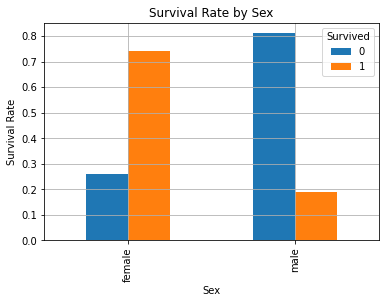

In [ ]:
# to find survival rate by sex
rel_2=pd.crosstab(df['Sex'],df['Survived'])
rel_2_normalize=rel_2.div(rel_2.sum(1).astype(float),axis=0)
rel_2_normalize.plot(kind='bar',title='Survival Rate by Sex',stacked=False,grid=True)
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

In [ ]:
#The majority of females survived, whereas the majority of males did not.
#Count males and females in each Pclass:
# Get the unique values of Pclass:
passenger_classes = sorted(df['Pclass'].unique())
passenger_classes


[1, 2, 3]

In [ ]:
for i in passenger_classes:
 print ('M : ',i ,len(df[(df['Sex'] == 'male') & (df['Pclass'] == i)]))
 print ('F : ',i ,len(df[(df['Sex'] =='female') & (df['Pclass'] == i)]))
male=df[df['Sex']=='male']
female=df[df['Sex']=='female']


M :  1 122
F :  1 94
M :  2 108
F :  2 76
M :  3 347
F :  3 144


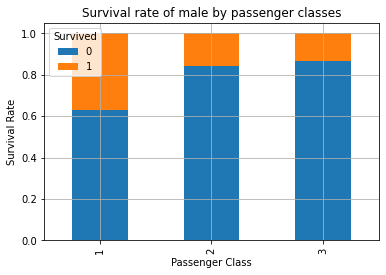

In [ ]:
#Plot survival rate by Sex and Pclass:
male_rel=pd.crosstab(male['Pclass'],male['Survived'])
male_rel_normalize=male_rel.div(male_rel.sum(1).astype(float),axis=0)
male_rel_normalize.plot(kind='bar',title='Survival rate of male by passenger classes',stacked='True',grid='True')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


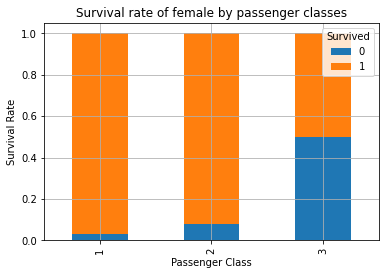

In [ ]:
female_rel=pd.crosstab(female['Pclass'],female['Survived'])
female_rel_normalize=female_rel.div(female_rel.sum(1).astype(float),axis=0)
female_rel_normalize.plot(kind='bar',title='Survival rate of female by passenger classes',stacked='True',grid='True')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [ ]:
#We make a new column 'Embarked_Value'and replace C,Q,S with 1,2,3
#so that we can carry out our machine learning algorithms on it.
df['Embarked_Value']=df['Embarked']
df['Embarked_Value'].replace(['C','Q','S'],[1,2,3],inplace=True)
embarked_locs = sorted(df['Embarked_Value'].unique())
embarked_locs
#df.head(10)


[1.0, 2.0, 3.0, nan]

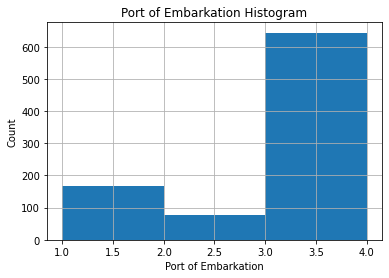

In [ ]:
#Visualization of embarkpoints
df['Embarked_Value'].plot(kind='hist',bins=3,range=(1,4),grid='True')
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

In [ ]:
#Feature3: Embarked
# To check invalid embarked values
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Value
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,NaN


In [ ]:
#Thus we can see that the Embarked Column is missing certain values, which have to be filled
#otherwise it may cause problems during the application of machine learning algorithms.
#Since the majority of passengers embarked in 'S': 3,
#we assign the missing values in Embarked to 'S':
df['Embarked_Value']=df['Embarked_Value'].fillna(3)
df['Embarked']=df['Embarked'].fillna('S')
embarked_locs = sorted(df['Embarked_Value'].unique())
print(embarked_locs)
embarked_locs1 = sorted(df['Embarked'].unique())
print(embarked_locs1)


[1.0, 2.0, 3.0]
['C', 'Q', 'S']


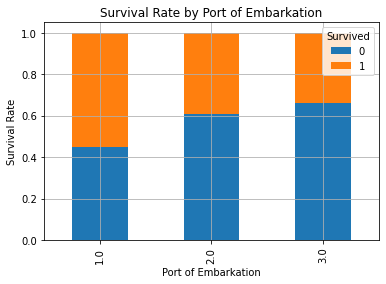

In [ ]:
# We have removed all nan successfully
# Now we can see the survival rate by port of embarkment
embarked_rel=pd.crosstab(df['Embarked_Value'],df['Survived'])
embarked_rel_normalize=embarked_rel.div(embarked_rel.sum(1).astype(float),axis=0)
embarked_rel_normalize.plot(kind='bar',title='Survival Rate by Port of Embarkation',grid='True',stacked='True')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()

In [ ]:
#Feature4 : Age
# check null ages
df[df['Age'].isnull()].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Value
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,2.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1,3.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0,1.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1,1.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0,2.0
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,1,3.0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,0,1.0
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,0,2.0
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,1,1.0
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,1,1.0


In [ ]:
#Here also many ages are missing. So we assign the missing ages the median values
#of the age according to their sex and passenger class.
df['Age_complete'] = df['Age']
df['Age_complete']=df['Age_complete'].groupby([df['Sex_Val'],df['Pclass']]).apply(lambda x: x.fillna(x.median()))
df['Age_complete'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    25.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age_complete, dtype: float64

In [ ]:
# to check any nan age
df[df['Age_complete'].isnull()].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Value,Age_complete


survived : 342
died : 549


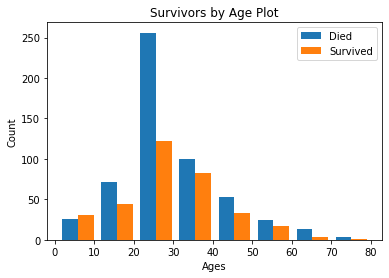

In [ ]:
age_survived=df[df['Survived']==1]['Age_complete']
age_not_survived = df[df['Survived'] == 0]['Age_complete']
max_age=max(df['Age_complete'])
print('survived :',len(age_survived))
print('died :',len(age_not_survived))
plt.hist([age_not_survived,age_survived],bins=8,range=(1, max_age),stacked=False)
plt.title('Survivors by Age Plot')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.legend(('Died','Survived'),loc='best')
plt.show()

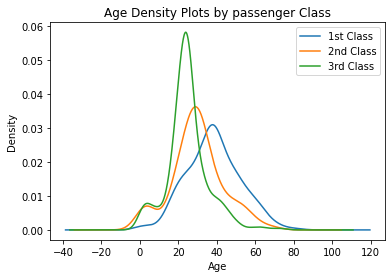

In [ ]:
#For more detailed analysis,we draw the age density plots.
for i in passenger_classes :
 df.Age_complete[df.Pclass==i].plot(kind='density')
plt.title('Age Density Plots by passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')
plt.show()

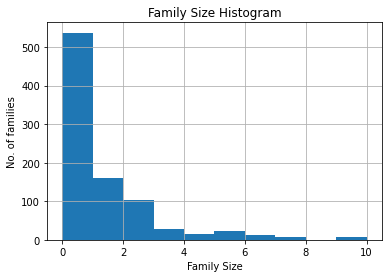

In [ ]:
#Thus we see the first class passengers were generally older then second class passengers,
#which in turn were older than third class passengers.
#Feature5 : Family Size
#We define a new feature FamilySize that is the sum of Parch (number of parents or children on board) and
#SibSp (number of siblings or spouses):
df['Family_Size'] = df['SibSp'] + df['Parch']
df['Family_Size'].hist(bins=10)
plt.xlabel('Family Size')
plt.ylabel('No. of families')
plt.title('Family Size Histogram')
plt.show()


survived : 342
died : 549


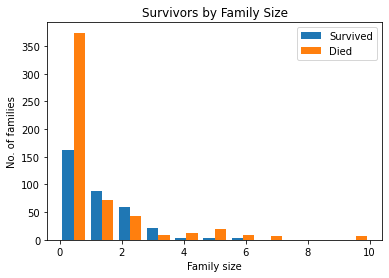

In [ ]:
family_sizes=sorted(df['Family_Size'].unique())
family_sizes_max=max(family_sizes)
family_size_survived=df[df['Survived']==1]['Family_Size']
family_size_not_survived=df[df['Survived']==0]['Family_Size']
print('survived :',len(family_size_survived))
print('died :',len(family_size_not_survived))
plt.hist([family_size_survived,family_size_not_survived],bins=family_sizes_max+1,range=(0, family_sizes_max),stacked=False)
plt.legend(('Survived','Died'), loc='best')
plt.xlabel('Family size')
plt.ylabel('No. of families')
plt.title('Survivors by Family Size')
plt.show()

In [ ]:
df.dtypes[df.dtypes.map(lambda x: x == 'object')]
df=df.drop(['Name','Sex','Ticket','Cabin','Embarked','SibSp','Parch','PassengerId','Age','Embarked_Value'],axis=1)
train_df=df
df.head(10)
df.columns

Index(['Survived', 'Pclass', 'Fare', 'Sex_Val', 'Age_complete', 'Family_Size'], dtype='object')

In [ ]:
# fields to be considered for ML
df.columns

Index(['Survived', 'Pclass', 'Fare', 'Sex_Val', 'Age_complete', 'Family_Size'], dtype='object')

In [ ]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import LabelEncoder
var_mod = []
le = LabelEncoder()
for i in var_mod:
 df[i] = le.fit_transform(df[i])

# Model 1 ML model considering the dependant variables of all elds except the
# independant variable Survived ['Pclass', 'Fare', 'Sex_Val', 'Age_complete', 'Family_Size']

In [ ]:
#Training and Testing dataset
array = df.values
X = array[:,1:]
Y = array[:,0]
Y=Y.astype('int')
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)
df.columns


Index(['Survived', 'Pclass', 'Fare', 'Sex_Val', 'Age_complete', 'Family_Size'], dtype='object')

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))


0.770949720670391


In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7988826815642458


In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.776536312849162


# Model 2- ML model considering the dependant variables of all elds except the
# independant variable Survived ['Pclass', 'Fare', 'Sex_Val']

In [ ]:
array = df.values
X = array[:,1:4]
Y = array[:,0]
Y=Y.astype('int')
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)
df.columns


Index(['Survived', 'Pclass', 'Fare', 'Sex_Val', 'Age_complete', 'Family_Size'], dtype='object')

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7262569832402235


In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7988826815642458


In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7988826815642458


# Model 3- ML model considering the dependant variables of all elds except the
# independant variable Survived ['Pclass', 'Fare']

In [ ]:
array = df.values
X = array[:,1:3]
Y = array[:,0]
Y=Y.astype('int')
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)
df.columns

Index(['Survived', 'Pclass', 'Fare', 'Sex_Val', 'Age_complete', 'Family_Size'], dtype='object')

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7262569832402235


In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7374301675977654


In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7262569832402235


In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logmodel.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       110
           1       0.74      0.45      0.56        69

    accuracy                           0.73       179
   macro avg       0.73      0.67      0.68       179
weighted avg       0.73      0.73      0.71       179



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)


array([[99, 11],
       [38, 31]])

True negative: 31 (We predicted a negative result and it was negative)
False positive: 11 (We predicted a positive result and it was negative)
False negative: 38 (We predicted a negative result and it was positive)
True positive: 99 (We predicted a positive result and it was positive)

Case Study: Model 1: 
Training dataset – 90%
 
Testing dataset – 10%


In [ ]:
#Training and Testing dataset
array = df.values
X = array[:,1:]
Y = array[:,0]
Y=Y.astype('int')
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.1, random_state=7)
df.columns

Index(['Survived', 'Pclass', 'Fare', 'Sex_Val', 'Age_complete', 'Family_Size'], dtype='object')

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7777777777777778


In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7888888888888889


In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.8222222222222222


Case Study: Model 1: Training dataset – 70%

Testing dataset – 30%

In [ ]:
#Training and Testing dataset
array = df.values
X = array[:,1:]
Y = array[:,0]
Y=Y.astype('int')
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=7)
df.columns

Index(['Survived', 'Pclass', 'Fare', 'Sex_Val', 'Age_complete', 'Family_Size'], dtype='object')

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7686567164179104


In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.75


In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7873134328358209


Case Study: Model 1: Training dataset – 60%

Testing dataset – 40%

In [ ]:
#Training and Testing dataset
array = df.values
X = array[:,1:]
Y = array[:,0]
Y=Y.astype('int')
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.4, random_state=7)
df.columns

Index(['Survived', 'Pclass', 'Fare', 'Sex_Val', 'Age_complete', 'Family_Size'], dtype='object')

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7843137254901961


In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7591036414565826


In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7983193277310925


Case Study: Model 2: 
Training dataset – 90%
 
Testing dataset – 10%



In [ ]:
array = df.values
X = array[:,1:4]
Y = array[:,0]
Y=Y.astype('int')
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.1, random_state=7)
df.columns

Index(['Survived', 'Pclass', 'Fare', 'Sex_Val', 'Age_complete', 'Family_Size'], dtype='object')

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7666666666666667


In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.8


In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.8


Case Study: Model 2: Training dataset – 70%

Testing dataset – 30%

In [ ]:
array = df.values
X = array[:,1:4]
Y = array[:,0]
Y=Y.astype('int')
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=7)
df.columns

Index(['Survived', 'Pclass', 'Fare', 'Sex_Val', 'Age_complete', 'Family_Size'], dtype='object')

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7425373134328358


In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7947761194029851


In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7910447761194029


Case Study: Model 2: Training dataset – 60%

Testing dataset – 40%

In [ ]:
array = df.values
X = array[:,1:4]
Y = array[:,0]
Y=Y.astype('int')
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.4, random_state=7)
df.columns

Index(['Survived', 'Pclass', 'Fare', 'Sex_Val', 'Age_complete', 'Family_Size'], dtype='object')

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7507002801120448


In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7871148459383753


In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7871148459383753


Case Study: Model 3:  
Training dataset – 90%
 
Testing dataset – 10%


In [ ]:
array = df.values
X = array[:,1:3]
Y = array[:,0]
Y=Y.astype('int')
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.1, random_state=7)
df.columns

Index(['Survived', 'Pclass', 'Fare', 'Sex_Val', 'Age_complete', 'Family_Size'], dtype='object')

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7222222222222222


In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7666666666666667


In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7888888888888889


Case Study: Model 3:
Training dataset – 70%

Testing dataset – 30%

In [ ]:
array = df.values
X = array[:,1:3]
Y = array[:,0]
Y=Y.astype('int')
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=7)
df.columns

Index(['Survived', 'Pclass', 'Fare', 'Sex_Val', 'Age_complete', 'Family_Size'], dtype='object')

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.6902985074626866


In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7014925373134329


In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7126865671641791


Case Study: Model 3: Training dataset – 60%

Testing dataset – 40%

In [ ]:
array = df.values
X = array[:,1:3]
Y = array[:,0]
Y=Y.astype('int')
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.4, random_state=7)
df.columns

Index(['Survived', 'Pclass', 'Fare', 'Sex_Val', 'Age_complete', 'Family_Size'], dtype='object')

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.680672268907563


In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.6610644257703081


In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.6694677871148459


In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           0       0.68      0.86      0.76       210
           1       0.68      0.43      0.53       147

    accuracy                           0.68       357
   macro avg       0.68      0.64      0.64       357
weighted avg       0.68      0.68      0.66       357



array([[180,  30],
       [ 84,  63]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
logmodel = DecisionTreeClassifier()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           0       0.68      0.81      0.74       210
           1       0.62      0.45      0.52       147

    accuracy                           0.66       357
   macro avg       0.65      0.63      0.63       357
weighted avg       0.65      0.66      0.65       357



array([[170,  40],
       [ 81,  66]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
logmodel = RandomForestClassifier()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           0       0.69      0.81      0.74       210
           1       0.64      0.48      0.54       147

    accuracy                           0.67       357
   macro avg       0.66      0.64      0.64       357
weighted avg       0.67      0.67      0.66       357



array([[170,  40],
       [ 77,  70]])